**importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car=pd.read_csv("/content/quikr_car.csv")

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [5]:
backup=car.copy()

**Quality**

In [6]:
#names are pretty inconsistent
#names have company names attached to it
#some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
#company: many of the names are not of any company like 'Used', 'URJENT', and so on.
#year has many non-year values
#year is in object. Change to integer
#Price has Ask for Price
#Price has commas in its prices and is in object
#kms_driven has object values with kms at last.
#It has nan values and two rows have 'Petrol' in them
#fuel_type has nan values

**year has many non-year values**

In [7]:
car=car[car['year'].str.isnumeric()]

**year is in object. Change to integer**

In [8]:
car['year']=car['year'].astype(int)

<ipython-input-8-c95edc1f455b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['year']=car['year'].astype(int)


**Price has Ask for Price**

In [9]:
car=car[car['Price']!='Ask For Price']

**Price has commas in its prices and is in object**

In [10]:
car['Price']=car['Price'].str.replace(",","").astype(int)

**kms_driven has object values with kms at last.**

In [11]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(",","")

In [12]:
car=car[car['kms_driven']!='Petrol']

In [13]:
car['kms_driven']=car['kms_driven'].astype(int)

**fuel_type has nan values**

In [14]:
car=car[~car['fuel_type'].isna()]

**Company does not need any cleaning now. Changing car names. Keeping only the first three words**

In [15]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')


**Resetting the index of the final cleaned data**

In [16]:
car=car.reset_index(drop=True)


In [17]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [18]:
car.to_csv("car_cleaned_data.csv")

In [19]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [20]:
car.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [21]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [22]:
car=car[car['Price']<6000000]

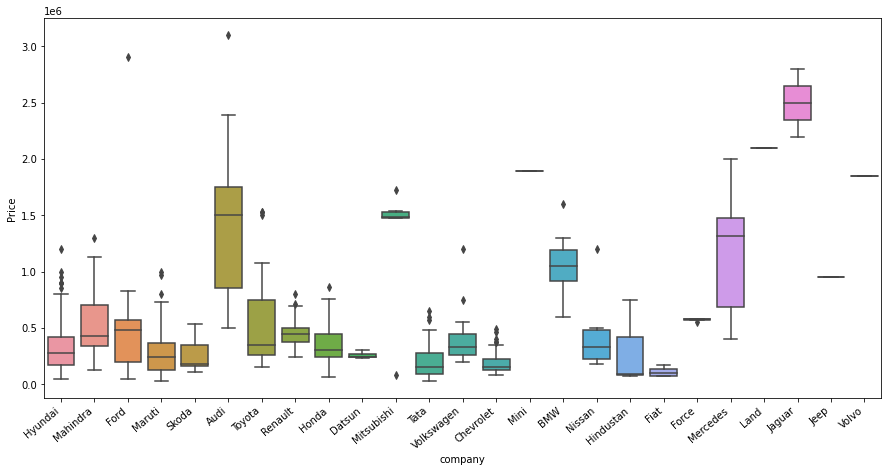

In [23]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()


**Checking relationship of Year with Price**

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


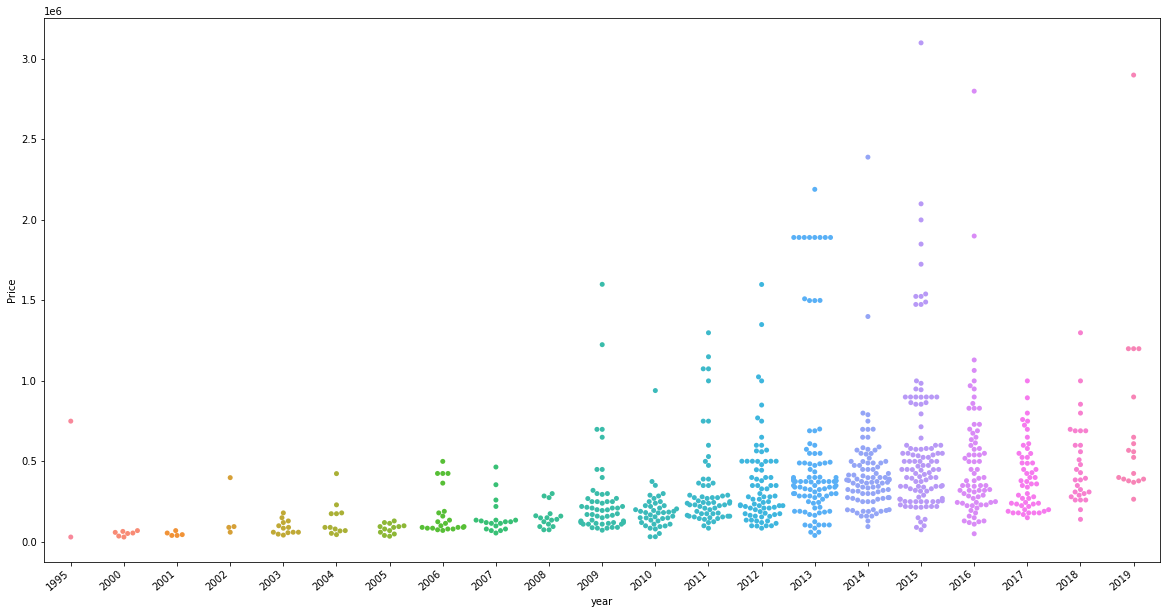

In [24]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()


**Checking relationship of kms_driven with Price**

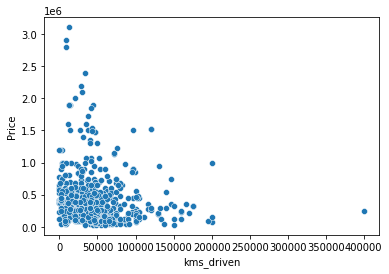

In [25]:
sns.scatterplot(x='kms_driven',y='Price',data=car)


**Checking relationship of Fuel Type with Price**

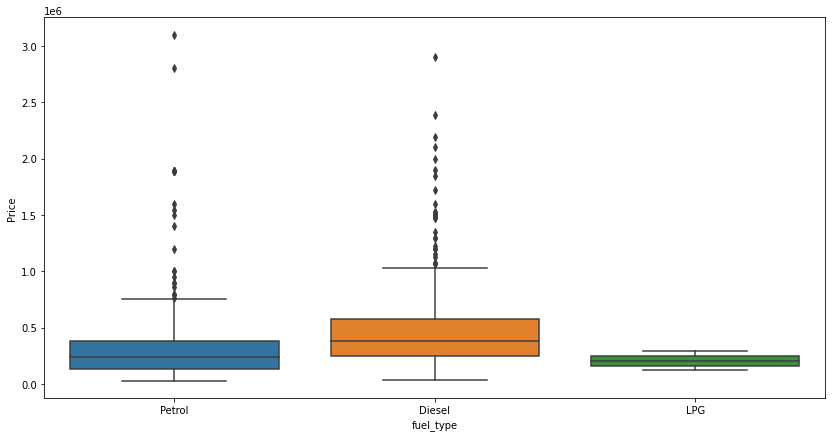

In [26]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

**Extracting Training Data**

In [27]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

**Applying Train Test Split**

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=321)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer


In [30]:
X_train.head()

,name,company,year,kms_driven,fuel_type
185,Maruti Suzuki Zen,Maruti,2000,60000,Petrol
127,Chevrolet Beat,Chevrolet,2015,30000,Petrol
309,Maruti Suzuki Dzire,Maruti,2015,45000,Diesel
478,Honda Brio VX,Honda,2017,11000,Petrol
459,Toyota Fortuner 3.0,Toyota,2015,120000,Diesel


In [31]:
X_test.head()

,name,company,year,kms_driven,fuel_type
234,Honda City,Honda,2015,39000,Diesel
492,Maruti Suzuki Swift,Maruti,2015,55000,Petrol
494,Honda Amaze 1.2,Honda,2014,6000,Petrol
78,Mahindra Scorpio VLX,Mahindra,2014,50000,Diesel
249,Chevrolet Enjoy 1.4,Chevrolet,2013,55000,Diesel


In [32]:
#one hot encoding
#trf1=ColumnTransformer([('ohe_encod',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,4])],remainder='passthrough')

In [33]:
#Creating a column transformer to transform categorical columns
column_trans=ColumnTransformer([('step',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,4])],
                                    remainder='passthrough')

In [34]:
lr=LinearRegression()

In [35]:
pipe=Pipeline([
    ('column',column_trans),
    ('lr',lr)
])


**Create Pipeline**

In [36]:
#pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)


Pipeline(steps=[('column',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('step',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 4])])),
                ('lr', LinearRegression())])

**Making a pipeline**

**Fitting the model**

**Explore the Pipeline**

In [37]:
y_pred = pipe.predict(X_test)


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [38]:
r2_score(y_test,y_pred)


0.8640875201351423

In [39]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
print(scores)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown cate

[-655082275567.504, 0.6249786950803615, -374618607.3144235, 0.5370376782804241, 0.8489499793792323, -19538927350.522427, -6518885184.306442, -22074150.34298167, -5289636597242.633, -5453489979836.597, 0.87377974615076, -511666786794.0503, -176731.02213856464, 0.871091686289198, -8246687836299.187, -170255190.36851296, -470970130742.6442, -69278.64935148523, -162369.36675445052, -130073152293169.25, -457009799492.24316, -3068428436.6800265, -0.4231708420829987, 0.5850208440791607, 0.617806401380631, 0.5543891259791078, 0.6556015240900664, -1269378227510.478, -1458267.688386052, -855712889523.6438, 0.5150206789072824, -99987216908637.45, -44633356520.30725, -325493149739.5599, 0.7316453916714966, 0.7652649141646091, -577294368051.3049, -714577170.8271282, -313982.0596228649, -1.0121961323056624e+16, -27767121593.648296, -6923345.343784775, -1042686138744837.0, 0.6262743840573137, 0.5612019102142816, -6574589478181.125, -4449107757210.373, 0.14881816383508217, 0.582575740332036, -42439350

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [40]:
np.argmax(scores)


959

In [41]:
scores[np.argmax(scores)]


0.9187866783089998

**The best model is found at a certain random state**

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.9187866783089998

In [47]:
dff=pd.read_csv("/content/car_cleaned_data.csv")
dff.drop(columns='Unnamed: 0',inplace=True)
dff.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [48]:
import pickle

In [49]:
pickle.dump(pipe,open('modelllli.pkl','wb'))
pickle.dump(dff,open('dff.pkl','wb'))

In [50]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2012,500,'Petrol']).reshape(1,5)))


array([273294.33150974])